# R-CNN with Inception v3

In [1]:
import os,cv2,keras
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from IPython import display

import config
from config import Config
import util

from tensorflow.keras.models import Sequential
from keras.layers import Dense
from keras import Model
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.vgg16 import VGG16
from keras.utils import plot_model
from keras.optimizers import Adam

from sklearn.model_selection import train_test_split
from fast_ml.model_development import train_valid_test_split
#from sklearn.preprocessing import LabelBinarizer
from keras.callbacks import ModelCheckpoint, EarlyStopping
import matplotlib.pyplot as plt

from tensorflow.keras.models import load_model
from numpy import save, load


In [2]:
"""
Setting Custom Configuration
"""

class WiderFaceConfig(Config):
    """Configuration for training on WIDER face dataset.
    WiderFaceConfig classs derives from the base Config class and overrides configurations specific
    to the WIDER Face dataset.
    """
    NAME = "wider_face_experiment1"
    WEIGHTS = "imagenet"
    LEARNING_RATE = 0.0001
    ROTATION_RANGE_IMAGEGEN = 90
    DTYPE_IMAGEGEN = 'uint8'
    MONITOR = 'val_loss'
    SAVE_FREQ = 'epoch'
    STEPS_PER_EPOCH = 10
    TOTAL_EPOCHS = 1000
    VALIDATION_STEPS = 2
    NUM_CLASSES = 2
    
config = WiderFaceConfig()    

In [3]:
config = WiderFaceConfig()

In [4]:
#setting image and annotation paths
#image_path = "WIDER FACE/WIDER_train/images"
#annot_path = "WIDER FACE/wider_face_split"

image_path = "../WIDER FACE/wider_train_final_3919/images"
annot_path = "../WIDER FACE/wider_train_final_3919/annots"

In [ ]:
# # draw rectangles on first image of the dataset using anotaions upto 9(<10)
# for e,i in enumerate(os.listdir(annot_path)):
#     if e < 2:
#         filename = i.split(".")[0]+".jpg"
#         #print(filename)
#         img = cv2.imread(os.path.join(image_path,filename), cv2.IMREAD_ANYCOLOR)
#         img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
#         df = pd.read_csv(os.path.join(annot_path,i), sep='\t', names=['temp'])
#         #plt.imshow(img)
#         for row in df.iterrows():
#             x1 = int(row[1][0].split(" ")[0])
#             y1 = int(row[1][0].split(" ")[1])
#             x2 = int(row[1][0].split(" ")[2])
#             y2 = int(row[1][0].split(" ")[3])
#             cv2.rectangle(img,(x1,y1),(x2,y2),(255,0,0), thickness = 2)
#         plt.figure()
#         plt.imshow(img)


In [5]:
def selective_search(image_path, image_name):
    """
    perform Fast Selective Search for the passed image
    """
    
    cv2.setUseOptimized(True)

    img = cv2.imread(os.path.join(image_path, image_name))

    ss = cv2.ximgproc.segmentation.createSelectiveSearchSegmentation()
    ss.setBaseImage(img)
    ss.switchToSelectiveSearchFast()
    ssresults = ss.process()
    
    return ssresults

In [ ]:
# im = cv2.imread(os.path.join(image_path,"0.jpg"))
# im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
# rects = selective_search(image_path,"0.jpg")
# imOut = im.copy()
# for i, rect in (enumerate(rects)):
#     x, y, w, h = rect
# #     print(x,y,w,h)
# #     imOut = imOut[x:x+w,y:y+h]
#     cv2.rectangle(imOut, (x, y), (x+w, y+h), (0, 255, 0), 1, cv2.LINE_AA)
# # plt.figure()
# plt.imshow(imOut)

# Image Preprocessing & Train-Test data preparation  

In [ ]:
# train_images=[]
# train_labels=[]

In [ ]:
# for e,i in enumerate(os.listdir(annot_path)):
#     try:
#         #if i.startswith("airplane"):
#             filename = i.split(".")[0]+".jpg"
#             print(e,filename)
#             image = cv2.imread(os.path.join(image_path,filename))
#             df = pd.read_csv(os.path.join(annot_path,i), sep='\t', names=['temp'])
#             gtvalues=[] 
#             for row in df.iterrows():
#                 x1 = int(row[1][0].split(" ")[0])
#                 y1 = int(row[1][0].split(" ")[1])
#                 x2 = int(row[1][0].split(" ")[2])
#                 y2 = int(row[1][0].split(" ")[3])
#                  # appending groundtruth values
#                 gtvalues.append({"x1":x1,"x2":x2,"y1":y1,"y2":y2})
#             ssresults = selective_search(image_path, filename)
#             imout = image.copy()
#             counter = 0
#             falsecounter = 0
#             flag = 0
#             fflag = 0
#             bflag = 0
#             for e,result in enumerate(ssresults):
#                 if e < config.MAX_REGIONS and flag == 0:
#                     for gtval in gtvalues:
#                         x,y,w,h = result
#                         iou = util.calculate_iou(gtval,{"x1":x,"x2":x+w,"y1":y,"y2":y+h})
#                         if counter < 30:
#                             if iou > 0.70:
#                                 timage = imout[y:y+h,x:x+w]
#                                 resized = cv2.resize(timage, (config.IMAGE_MIN_DIM, config.IMAGE_MAX_DIM), interpolation = cv2.INTER_AREA)
#                                 train_images.append(resized)
#                                 train_labels.append(1)
#                                 counter += 1
#                         else :
#                             fflag =1
#                         if falsecounter <30:
#                             if iou < 0.3:
#                                 timage = imout[y:y+h,x:x+w]
#                                 resized = cv2.resize(timage, (config.IMAGE_MIN_DIM,config.IMAGE_MAX_DIM), interpolation = cv2.INTER_AREA)
#                                 train_images.append(resized)
#                                 train_labels.append(0)
#                                 falsecounter += 1
#                         else :
#                             bflag = 1
#                     if fflag == 1 and bflag == 1:
#                         print("inside")
#                         flag = 1
#     except Exception as e:
#         print(e)
#         print("error in "+filename)
#         continue

In [ ]:
# X_new = np.array(train_images)
# y_new = np.array(train_labels)

In [ ]:
# X_new.shape

In [ ]:
# save('X_new.npy', X_new)
# save('y_new.npy', y_new)

In [6]:
X_new = load('X_new_950.npy')
y_new = load('y_new_950.npy')

In [7]:
X_new.shape

(31978, 224, 224, 3)

# Model Formation and Training

In [23]:
from tensorflow.keras.applications.inception_v3 import InceptionV3
from keras.layers import Dense, GlobalAveragePooling2D
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers.convolutional import Conv2D
from keras.layers.pooling import MaxPooling2D
from tensorflow.keras.optimizers import RMSprop

incepv3_model= InceptionV3(include_top=False,
                         input_shape=(224,224,3),
                         weights='imagenet')

for each_layer in incepv3_model.layers:
        each_layer.trainable=False

# adding a global spatial average pooling layer
x = incepv3_model.output
x = GlobalAveragePooling2D()(x)
# adding fully-connected layer
x = Dense(1024, activation='relu', name='fc1')(x)
dropout_layer = Dropout(0.2, name='dropout')(x)
predictions = Dense(2, activation='sigmoid', name='predictions')(dropout_layer)

# fc1 = Dense(1024, activation='relu', name='fc1')(flatten_layer)
# dropout_layer = Dropout(0.2, name='dropout')(fc1)
# predictions = Dense(2, activation='sigmoid', name='predictions')(dropout_layer)

In [ ]:
#freezing the [Block 1, Block 2, Block 3, Block 4] = first 15(index 0 to 14) layers => 10 trainable layers
# for layers in (vggmodel.layers)[:15]:
#     print(layers)
#     layers.trainable = False

In [ ]:
#vggmodel.layers[-5]
#print(vggmodel.layers[-5])

In [ ]:
#block5_pool_output = vggmodel.layers[-5].output
#print(block5_pool_output)

In [ ]:
# from keras.layers import Dense
# from keras.layers import Flatten
# from keras.layers.convolutional import Conv2D
# from keras.layers.pooling import MaxPooling2D
# # custom layers -Block6
# block6_conv1 = Conv2D(filters=1024, kernel_size=(3, 3), activation='relu', padding='same', name='block6_conv1')(block5_pool_output)
# block6_conv2 = Conv2D(filters=1024, kernel_size=(3, 3), activation='relu', padding='same', name='block6_conv2')(block6_conv1)
# block6_conv3 = Conv2D(filters=1024, kernel_size=(3, 3), activation='relu', padding='same', name='block6_conv3')(block6_conv2)
# block6_pool = MaxPooling2D(pool_size=(2, 2), strides=(2, 2), name='block6_pool')(block6_conv3)

In [ ]:
# #Add the fully-connected layers 
# flatten = Flatten(name='flatten')(block6_pool)
# hidden_fc1 = Dense(4096, activation='relu', name='fc1')(flatten)
# hidden_fc2 = Dense(4096, activation='relu', name='fc2')(hidden_fc1)
# predictions = Dense(2, activation='softmax', name='predictions')(hidden_fc2)

In [ ]:
# model_final = Model(inputs = vggmodel.input, 
#                     outputs = predictions)

In [ ]:
# from keras.layers import Dense
# from keras.layers import Flatten
# from keras.layers import Dropout
# from keras.layers.convolutional import Conv2D
# from keras.layers.pooling import MaxPooling2D
# from tensorflow.keras.optimizers import RMSprop

# flatten_layer = Flatten()(incepv3_model.output)
# fc1 = Dense(1024, activation='relu', name='fc1')(flatten_layer)
# dropout_layer = Dropout(0.2, name='dropout')(fc1)
# predictions = Dense(2, activation='sigmoid', name='predictions')(dropout_layer)

In [24]:
model_final = Model(inputs = incepv3_model.input, 
                    outputs = predictions)

In [ ]:
#import visualkeras
#visualkeras.layered_view(model)
plot_model(model_final, to_file='incepv3_plot.png', show_shapes=True, show_layer_names=True)

In [25]:
#opt = Adam(learning_rate=config.LEARNING_RATE)
opt = RMSprop(lr=config.LEARNING_RATE)

In [26]:
model_final.compile(loss = keras.losses.categorical_crossentropy, 
                    optimizer = opt, 
                    metrics=["accuracy"])

In [13]:
from sklearn.preprocessing import LabelBinarizer
# labelbinarizer = LabelBinarizer()
# make_encoded_results = labelbinarizer.fit_transform(y_new)

In [ ]:
# lenc = util.MyLabelBinarizer()
# Y =  lenc.fit_transform(y_new)

In [14]:
#X_train, X_test , y_train, y_test = train_test_split(X_new,Y,test_size=0.10)
#X_train, y_train, X_valid, y_valid, X_test, y_test = train_valid_test_split(X_new, target=Y, train_size=0.8, valid_size=0.1, test_size=0.1)

# X_train, X_rem, y_train, y_rem = train_test_split(X_new, Y, train_size=0.60)
# test_size = 0.5
# X_valid, X_test, y_valid, y_test = train_test_split(X_rem, y_rem, test_size=test_size)
X_train, X_test , y_train, y_test = train_test_split(X_new, y_new, test_size=0.40)

In [ ]:
# print(X_train.shape,y_train.shape,X_valid.shape,y_valid.shape,X_test.shape,y_test.shape)

In [ ]:
# trdata = ImageDataGenerator(horizontal_flip=True, vertical_flip=True, rotation_range=config.ROTATION_RANGE_IMAGEGEN, dtype=config.DTYPE_IMAGEGEN)
# train_data = trdata.flow(x=X_train, y=y_train)
# vldata = ImageDataGenerator(horizontal_flip=True, vertical_flip=True, rotation_range=config.ROTATION_RANGE_IMAGEGEN, dtype=config.DTYPE_IMAGEGEN)
# valid_data = vldata.flow(x=X_valid, y=y_valid)
# tsdata = ImageDataGenerator(horizontal_flip=True, vertical_flip=True, rotation_range=config.ROTATION_RANGE_IMAGEGEN, dtype=config.DTYPE_IMAGEGEN)
# test_data = tsdata.flow(x=X_test, y=y_test)

In [ ]:
# checkpoint = ModelCheckpoint("exp6_rcnn_incepv3_1.h5", monitor=config.MONITOR, verbose=1, save_best_only=True, save_weights_only=False, mode='auto', save_freq=config.SAVE_FREQ)
# early = EarlyStopping(monitor=config.MONITOR, min_delta=config.MIN_DELTA, patience=config.PATIENCE, verbose=1, mode='auto')

In [ ]:
# history = model_final.fit(x= train_data, steps_per_epoch= config.STEPS_PER_EPOCH, epochs= config.TOTAL_EPOCHS, validation_data= valid_data, validation_steps=config.VALIDATION_STEPS, callbacks=[checkpoint,early])

In [15]:
labelbin_test = util.MyLabelBinarizer()
y_test = labelbin_test.fit_transform(y_test)

In [27]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold

# ===============Stratified K-Fold======================

skf = KFold(n_splits=3, shuffle=True)
skf.get_n_splits(X_train, y_train)
fold_var = 1

TRAIN_ACCURACY = []
TRAIN_LOSS = []
VALIDATION_ACCURACY = []
VALIDATION_LOSS = []

for train_index, val_index in skf.split(X_train, y_train):
    print("---Starting K-fold validation Iteration - "+str(fold_var)+"---")
    
    X_train_fold, y_train_fold = np.take(X_train, train_index, 0), np.take(y_train, train_index, 0)    
    X_valid_fold, y_valid_fold = np.take(X_train, val_index, 0), np.take(y_train, val_index, 0) 
    
    #X_train, y_train = X_new.iloc[train_index], Y.iloc[train_index]
    #X_valid, y_valid = X_new.iloc[val_index], Y.iloc[val_index]
    
    labelbin = util.MyLabelBinarizer()
    y_train_fold_bin = labelbin.fit_transform(y_train_fold)
    y_valid_fold_bin =  labelbin.fit_transform(y_valid_fold)

    #initialize ImageDataGenerators 
    train_datagen = ImageDataGenerator(horizontal_flip=True, 
                                       vertical_flip=True, 
                                       rotation_range=config.ROTATION_RANGE_IMAGEGEN, 
                                       dtype=config.DTYPE_IMAGEGEN)
    
    validation_datagen = ImageDataGenerator(horizontal_flip=True, 
                                            vertical_flip=True, 
                                            rotation_range=config.ROTATION_RANGE_IMAGEGEN, 
                                            dtype=config.DTYPE_IMAGEGEN)
    
    train_data = train_datagen.flow(x=X_train_fold, y=y_train_fold_bin)
    
    valid_data = validation_datagen.flow(x=X_valid_fold, y=y_valid_fold_bin)
    
    model_name = "exp6_rcnn_incepv3_kfcv_"+str(fold_var)+".h5"
    checkpoint = ModelCheckpoint(model_name, monitor=config.MONITOR, verbose=1, save_best_only=True, save_weights_only=False, mode='auto', save_freq=config.SAVE_FREQ)
    early = EarlyStopping(monitor=config.MONITOR, min_delta=config.MIN_DELTA, patience=config.PATIENCE, verbose=1, mode='auto')

    # fit model
    #history = model.fit(train_generator, epochs=epoch)
    history = model_final.fit(x= train_data, steps_per_epoch= config.STEPS_PER_EPOCH, epochs= config.TOTAL_EPOCHS, validation_data= valid_data, validation_steps=config.VALIDATION_STEPS, callbacks=[checkpoint,early])

    #score = model_final.evaluate(X_test, y_test, verbose=1)
    #predictions = model_final.predict(validation_generator, verbose=1)
    #y_predictions = np.argmax(predictions, axis=1)
    #true_classes = validation_generator.classes
    
    TRAIN_ACCURACY.append(history.history['accuracy'])
    TRAIN_LOSS.append(history.history['loss'])
    VALIDATION_ACCURACY.append(history.history['val_accuracy'])
    VALIDATION_LOSS.append(history.history['val_loss'])
    
    tf.keras.backend.clear_session()
    
    fold_var += 1
    
    # evaluate validation performance
    #print("***Performance on Validation data***")
    #val_acc, val_prec, val_fScore = my_metrics(true_classes, y_predictions)

---Starting K-fold validation Iteration - 1---
Epoch 1/1000
10/10 [==============================] - ETA: 0s - loss: 7.0367 - accuracy: 0.7719
Epoch 1: val_loss improved from inf to 2.49051, saving model to exp6_rcnn_incepv3_kfcv_1.h5
10/10 [==============================] - 8s 443ms/step - loss: 7.0367 - accuracy: 0.7719 - val_loss: 2.4905 - val_accuracy: 0.9062
Epoch 2/1000
10/10 [==============================] - ETA: 0s - loss: 1.7125 - accuracy: 0.8938
Epoch 2: val_loss improved from 2.49051 to 1.51330, saving model to exp6_rcnn_incepv3_kfcv_1.h5
10/10 [==============================] - 3s 314ms/step - loss: 1.7125 - accuracy: 0.8938 - val_loss: 1.5133 - val_accuracy: 0.9062
Epoch 3/1000
10/10 [==============================] - ETA: 0s - loss: 3.0002 - accuracy: 0.8531
Epoch 3: val_loss did not improve from 1.51330
10/10 [==============================] - 2s 241ms/step - loss: 3.0002 - accuracy: 0.8531 - val_loss: 3.2102 - val_accuracy: 0.9219
Epoch 4/1000
10/10 [=================

# Visualization of Training Results

In [ ]:
#model_final = load_model('exp6_rcnn_incepv3_1.h5')

In [28]:
# Generate generalization metrics
score = model_final.evaluate(X_test, y_test, verbose=1)
print(f'Test loss: {score[0]} / Test accuracy: {score[1]}')

400/400 [==============================] - 31s 76ms/step - loss: 0.1624 - accuracy: 0.9576
Test loss: 0.16240651905536652 / Test accuracy: 0.9576297402381897


In [29]:
save('incepv3_train_acc.npy', np.array(TRAIN_ACCURACY))
save('incepv3_train_loss.npy', np.array(TRAIN_LOSS))
save('incepv3_val_acc.npy', np.array(VALIDATION_ACCURACY))
save('incepv3_val_loss.npy', np.array(VALIDATION_LOSS))

In [30]:
TRAIN_ACCURACY = load('incepv3_train_acc.npy', allow_pickle=True)
TRAIN_LOSS = load('incepv3_train_loss.npy', allow_pickle=True)
VALIDATION_ACCURACY = load('incepv3_val_acc.npy', allow_pickle=True)
VALIDATION_LOSS = load('incepv3_val_loss.npy',allow_pickle=True)

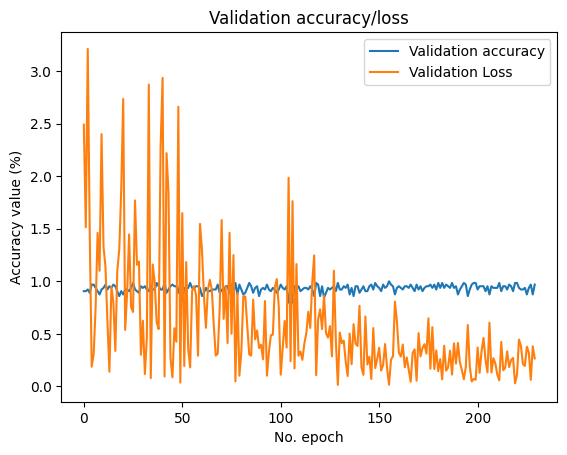

In [31]:
plt.plot(VALIDATION_ACCURACY[0])
plt.plot(VALIDATION_LOSS[0])
plt.title('Validation accuracy/loss')
plt.ylabel('Accuracy value (%)')
plt.xlabel('No. epoch')
plt.legend(["Validation accuracy","Validation Loss"])
plt.show()

In [ ]:
# Visualize history
# Plot history: Loss
plt.plot(history.history['val_loss'])
plt.title('Validation loss history')
plt.ylabel('Loss value')
plt.xlabel('No. epoch')
plt.show()

# Plot history: Accuracy
plt.plot(history.history['val_accuracy'])
plt.title('Validation accuracy history')
plt.ylabel('Accuracy value (%)')
plt.xlabel('No. epoch')
plt.show()

In [ ]:
# plt.plot(hist.history["acc"])
# plt.plot(hist.history['val_acc'])
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("model loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(["Train Loss","Validation Loss"])
plt.show()
#plt.savefig('chart loss.png')

In [ ]:
plt.plot(history.history["accuracy"])
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accuracy","Validation Accuracy","loss","Validation Loss"])
plt.show()

# Prediction

In [ ]:
#model_final = load_model('exp4_rcnn_vgg16_1.h5')

In [ ]:
im = X_test[40]
plt.imshow(im)
img = np.expand_dims(im, axis=0)
out= model_final.predict(img)
if out[0][0] > out[0][1]:
    print("face")
else:
    print("not face")

In [ ]:
rects = []
#filename = '137.jpg'
#filename = '23.jpg'
filename = '478.jpg'
img = cv2.imread(os.path.join(image_path, filename))
ssresults = selective_search(image_path, filename)
imout = img.copy()
for e,result in enumerate(ssresults):
    if e < config.MAX_REGIONS:
        x,y,w,h = result
        timage = imout[y:y+h,x:x+w]
        resized = cv2.resize(timage, (config.IMAGE_MIN_DIM, config.IMAGE_MAX_DIM), interpolation = cv2.INTER_AREA)
        img = np.expand_dims(resized, axis=0)
        out= model_final.predict(img)
        if out[0][0] > 0.65:
            rects.append([x, y, x+w, y+h])
            cv2.rectangle(imout, (x, y), (x+w, y+h), (255, 0, 127), 2, cv2.LINE_AA)
plt.figure()
plt.imshow(cv2.cvtColor(imout, cv2.COLOR_BGR2RGB))

In [ ]:
#filename = '137.jpg'
#filename = '23.jpg'
filename = '478.jpg'
img = cv2.imread(os.path.join(image_path, filename))
imout2 = img.copy()

rects_ = np.array(rects)
pick = util.non_max_suppression_fast(rects_, overlapThresh=0.50) #original = 0.65

# draw the final bounding boxes
for (xA, yA, xB, yB) in pick:
    cv2.rectangle(imout2, (xA, yA), (xB, yB), (0, 255, 0), 2)
    
plt.figure()
plt.imshow(cv2.cvtColor(imout2, cv2.COLOR_BGR2RGB))